# Exploration des données

In [1]:

import numpy as np #  manip des arrays (tableaux)
import pandas as pd #  manip des dataframes
import matplotlib.pyplot as plt #  construct des graphes : barplot, cammenberts
import seaborn as sns

df = pd.read_csv('processed.cleveland.csv', names=['age','sex','chest pain','blood pressure(r)','cholestoral','fasting blood sugar','eleccardio results(r)','max heart rate achvd','exercise angina','ST depression (ex to r)','slope exercise ST','number of vessels','thalassemia','diagnosis'])
df.describe()
df1 = df
df.describe()

<AxesSubplot:>

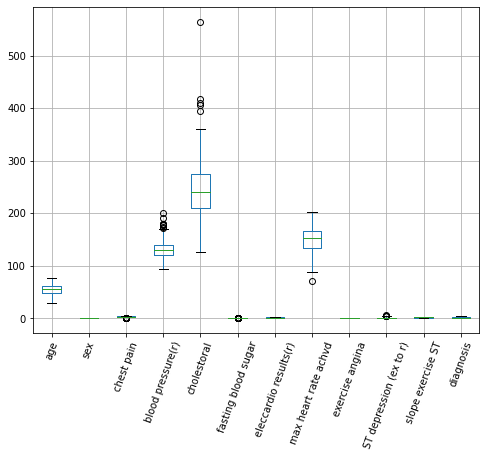

In [2]:
df.boxplot(figsize=[8,6], rot=70)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


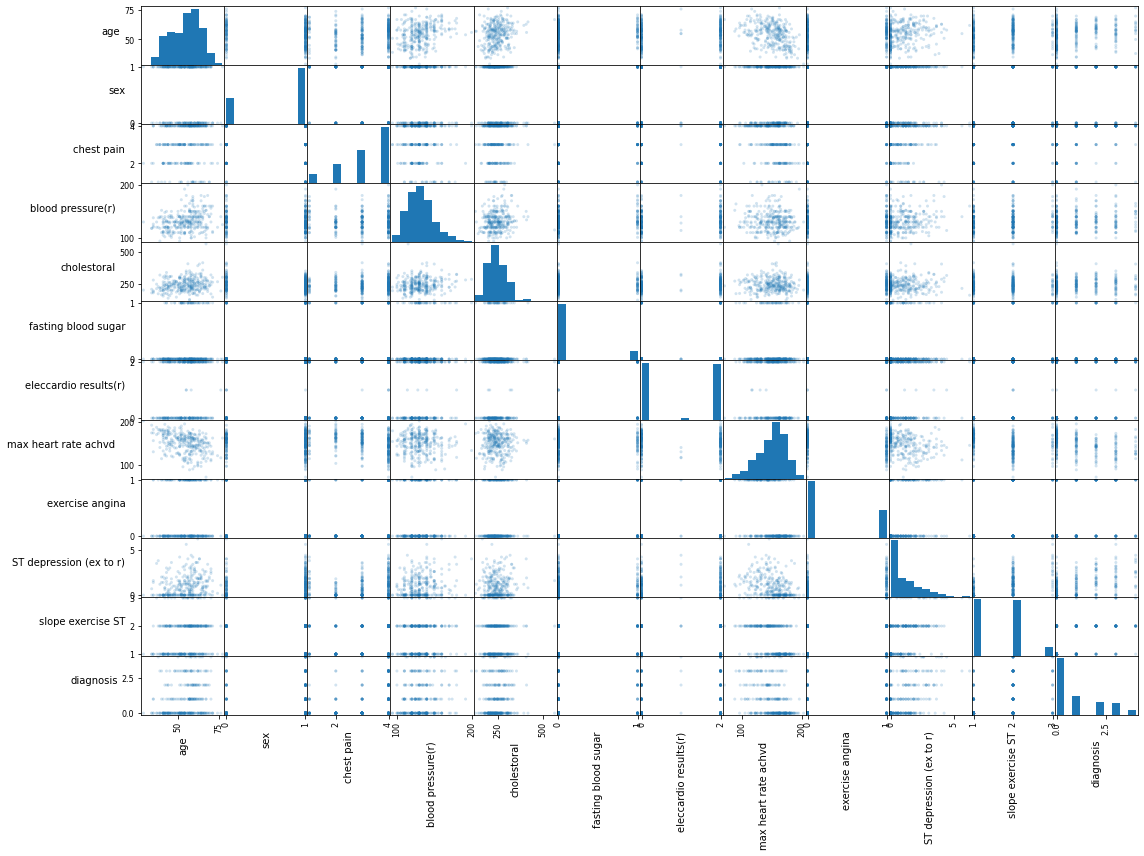

In [3]:
# from pandas.plotting import scatter_matrix
# scatter_mat = scatter_matrix(df, figsize = (20,16))

axes = pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (16,12))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [4]:
df_corr = df.corr()
df_corr

,age,sex,chest pain,blood pressure(r),cholestoral,fasting blood sugar,eleccardio results(r),max heart rate achvd,exercise angina,ST depression (ex to r),slope exercise ST,diagnosis
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
chest pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
blood pressure(r),0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
cholestoral,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fasting blood sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
eleccardio results(r),0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
max heart rate achvd,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
exercise angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
ST depression (ex to r),0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


In [5]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
            props=[("font-size", "7pt")]),
            dict(selector="td",
            props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
            props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
            props=[('max-width', '200px'),
            ('font-size', '12pt')])
        ]
        
df_corr.style.background_gradient(cmap, axis=1).set_properties(**{'hello':'80px','font-size':'10pt'}).set_caption("Hover to magify").set_precision(2).set_table_styles(magnify())



,age,sex,chest pain,blood pressure(r),cholestoral,fasting blood sugar,eleccardio results(r),max heart rate achvd,exercise angina,ST depression (ex to r),slope exercise ST,diagnosis
age,1.00,-0.10,0.10,0.28,0.21,0.12,0.15,-0.39,0.09,0.20,0.16,0.22
sex,-0.10,1.00,0.01,-0.06,-0.20,0.05,0.02,-0.05,0.15,0.10,0.04,0.22
chest pain,0.10,0.01,1.00,-0.04,0.07,-0.04,0.07,-0.33,0.38,0.20,0.15,0.41
blood pressure(r),0.28,-0.06,-0.04,1.00,0.13,0.18,0.15,-0.05,0.06,0.19,0.12,0.16
cholestoral,0.21,-0.20,0.07,0.13,1.00,0.01,0.17,-0.00,0.06,0.05,-0.00,0.07
fasting blood sugar,0.12,0.05,-0.04,0.18,0.01,1.00,0.07,-0.01,0.03,0.01,0.06,0.06
eleccardio results(r),0.15,0.02,0.07,0.15,0.17,0.07,1.00,-0.08,0.08,0.11,0.13,0.18
max heart rate achvd,-0.39,-0.05,-0.33,-0.05,-0.00,-0.01,-0.08,1.00,-0.38,-0.34,-0.39,-0.42
exercise angina,0.09,0.15,0.38,0.06,0.06,0.03,0.08,-0.38,1.00,0.29,0.26,0.40
ST depression (ex to r),0.20,0.10,0.20,0.19,0.05,0.01,0.11,-0.34,0.29,1.00,0.58,0.50


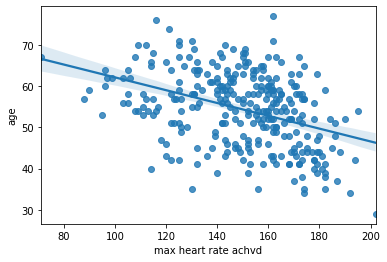

In [6]:
# Régression linéaire ajustée au graphique précédent
sns.regplot(x=df["max heart rate achvd"], y=df["age"], fit_reg=True)
plt.show()

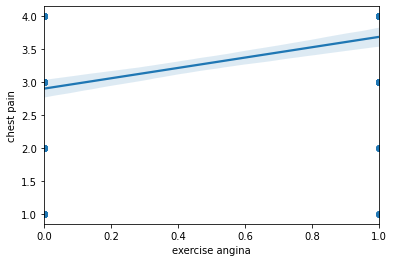

In [7]:
# df.plot(x='exercise angina', y='chest pain', style='o')
sns.regplot(x=df["exercise angina"], y=df["chest pain"], fit_reg=True)
plt.show()

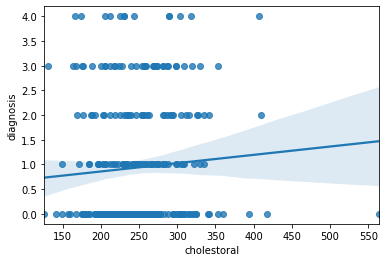

In [8]:
# df.plot(x='exercise angina', y='chest pain', style='o')
sns.regplot(x=df["cholestoral"], y=df["diagnosis"], fit_reg=True)
plt.show()

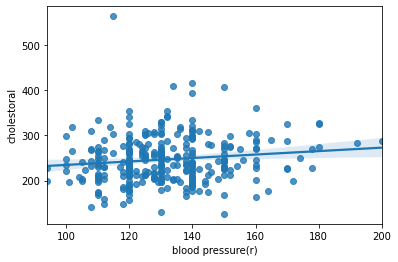

In [9]:
# df.plot(x='blood pressure(r)', y='cholestoral', style='o')
sns.regplot(x=df["blood pressure(r)"], y=df["cholestoral"], fit_reg=True)
plt.show()


<AxesSubplot:xlabel='age'>

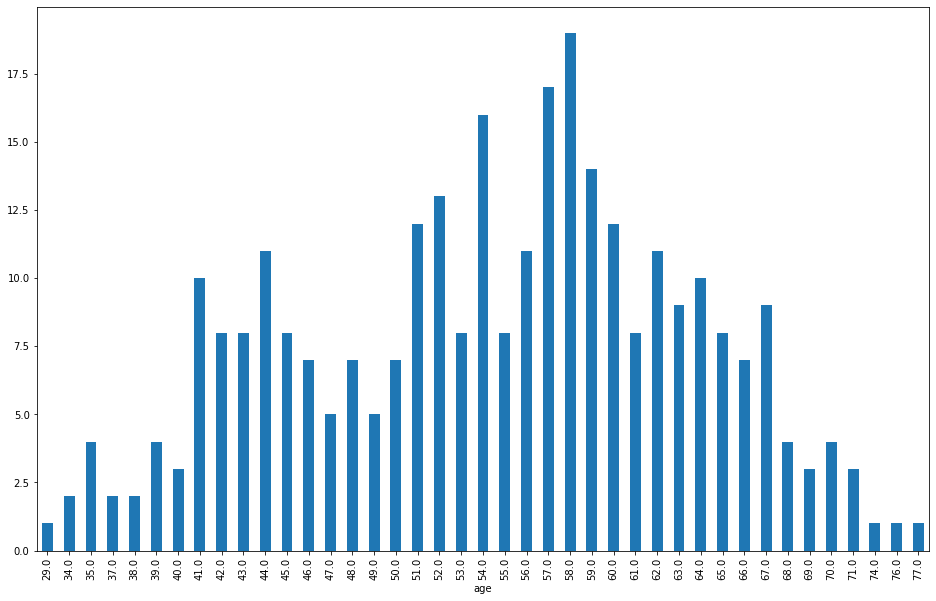

In [10]:
graph = df.groupby(['age'])['age'].count()
graph.plot(kind = 'bar', figsize=(16, 10))

<AxesSubplot:xlabel='sex'>

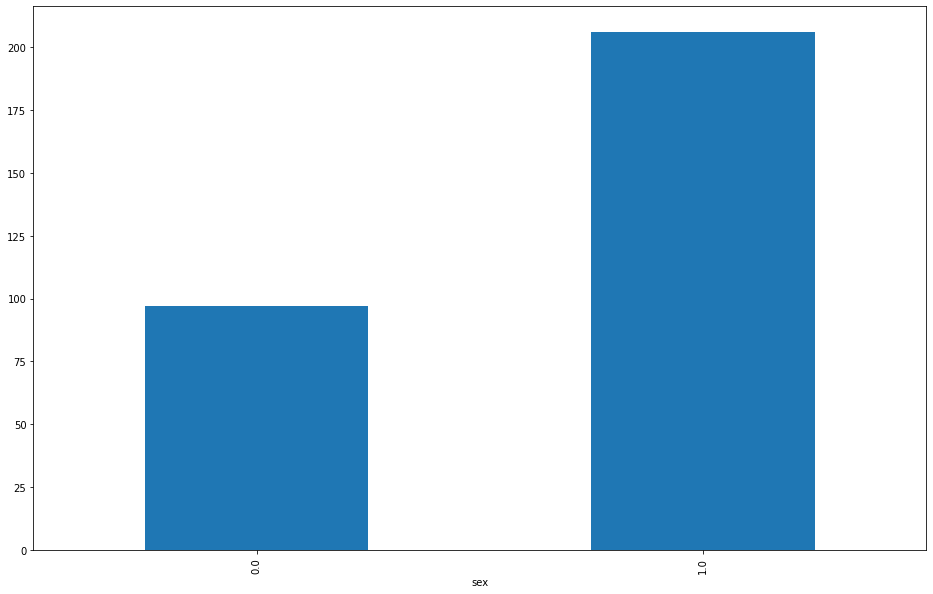

In [11]:
graph = df.groupby(['sex'])['sex'].count()
graph.plot(kind = 'bar', figsize=(16, 10))

In [12]:
# On nettoie les valeurs nulles
df = df[df["number of vessels"].str.contains("\?")==False]
df = df[df["thalassemia"].str.contains("\?")==False]

df.describe()


,age,sex,chest pain,blood pressure(r),cholestoral,fasting blood sugar,eleccardio results(r),max heart rate achvd,exercise angina,ST depression (ex to r),slope exercise ST,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


<AxesSubplot:>

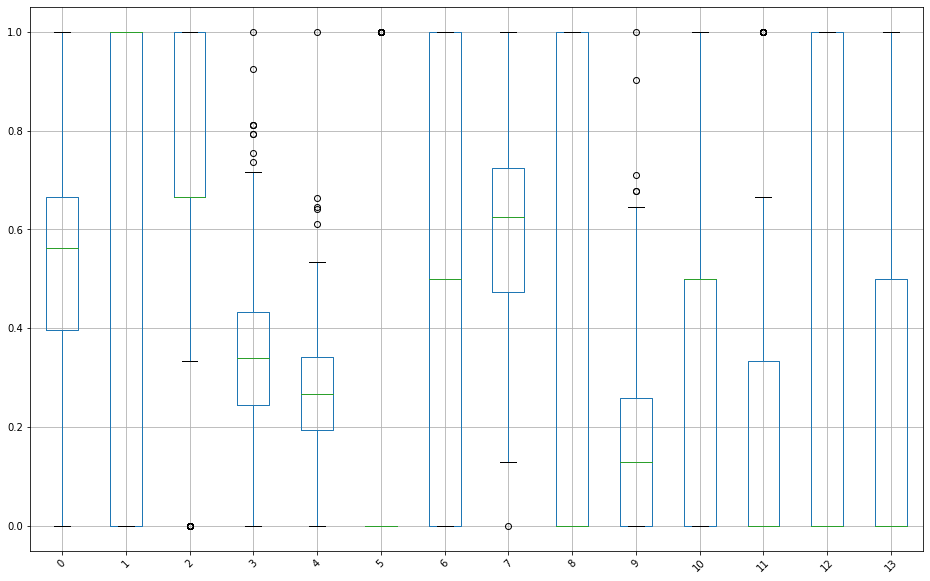

In [13]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

df_minmax = min_max.fit_transform(df)
df_minmax = pd.DataFrame(df_minmax)
df_minmax.boxplot(rot = 45,figsize=(16, 10))

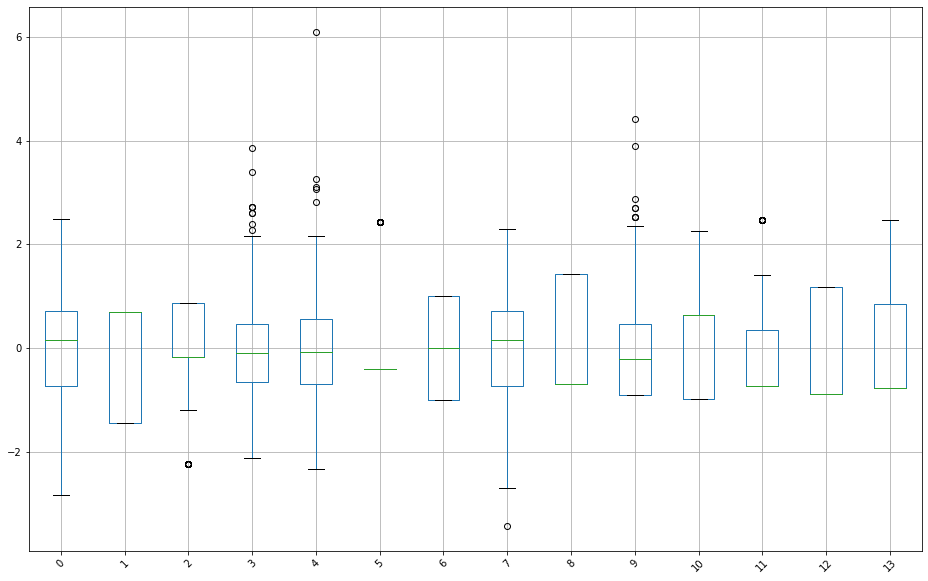

In [14]:
from sklearn.preprocessing import scale

df_scale = scale(df)
df_scale
pd.DataFrame(df_scale).boxplot(rot = 45,figsize=(16, 10))
df_scale = pd.DataFrame(df_scale)

# Split

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_minmax.iloc[:,0:13]
y = df_minmax.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42, stratify=y)

# FIXME : Restore initial classes
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
le.fit(y_test)
y_test = le.transform(y_test)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_scale = df_scale.iloc[:,0:13]
y_scale = df.iloc[:,-1]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scale, y_scale, test_size=1/4, random_state=42, stratify=y)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=15)
knn1.fit(X_train1, y_train1)
knn1.effective_metric_

'euclidean'

## Evaluer avec scale

In [18]:
# y_pred1, X_scale, y_scale scaler avec la méthode scale
y_pred1 = knn1.predict(X_test1)

from sklearn import metrics

def evaluate_this(y_test1,y_pred1):
    print(metrics.accuracy_score(y_test1, y_pred1))
    print(metrics.f1_score(y_test1, y_pred1, average='weighted'))

evaluate_this(y_test1,y_pred1)

0.56
0.4892198581560283


# Entraîner le modèle

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.effective_metric_

'euclidean'

# Prédir

In [20]:
y_pred = knn.predict(X_test)

# Evaluer

In [21]:
from sklearn import metrics

def evaluate_this(y_test,y_pred):
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.f1_score(y_test, y_pred, average='weighted'))

evaluate_this(y_test,y_pred)

0.5333333333333333
0.5113544500582977


# Try to guess better K

## k-fold cross validation

Minimum CV error :  0.41857707509881426  % at K = 15
Minimum error:  0.3466666666666667  % at K = 5


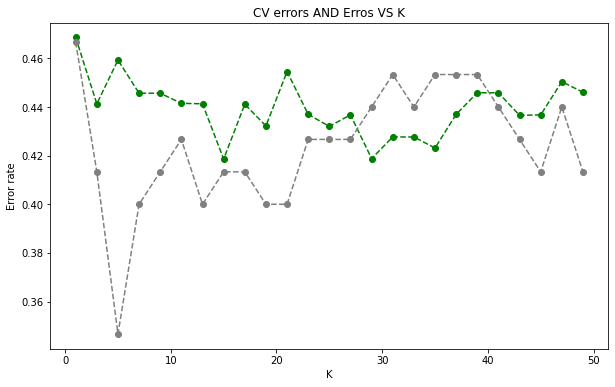

In [22]:
# https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb pour l'approche basique
# https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/ pour le cross validation

from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

cv_scores = []
error_rate = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

# changing CV accuracy => to CV error
cv_errors = [1 - x for x in cv_scores]

# determining best k for both methods
cv_optimal_k = neighbors[cv_errors.index(min(cv_errors))]
error_optimal_k = neighbors[error_rate.index(min(error_rate))]

plt.figure(figsize=(10,6))
plt.plot(neighbors, cv_errors, color='green', linestyle='dashed', 
         marker='o', markersize=6)

plt.plot(neighbors, error_rate, color='grey', linestyle='dashed', 
         marker='o', markersize=6)


plt.title('CV errors AND Erros VS K')
plt.xlabel("K")
plt.ylabel("Error rate")

print("Minimum CV error : ", min(cv_errors)," % at K =", cv_optimal_k)
print("Minimum error: ", min(error_rate)," % at K =", error_optimal_k)


### Best K is 15 !

> 5 seems good, but it is probably overfiting

In [23]:
df = pd.DataFrame({"neighbors" : neighbors, "CV errors" : cv_errors, "Errors" : error_rate}, index=neighbors)
# df = df.sort_values('errors', ascending=True)
df = df.sort_values(['CV errors', 'neighbors'], ascending=[True, False])
df.head(15)

,neighbors,CV errors,Errors
15,15,0.418577,0.413333
29,29,0.418775,0.440000
35,35,0.423123,0.453333
33,33,0.427668,0.440000
31,31,0.427668,0.453333
25,25,0.432016,0.426667
19,19,0.432213,0.400000
43,43,0.436561,0.426667
45,45,0.436759,0.413333
27,27,0.436759,0.426667


# Rerun model with new K

In [24]:
K = 15

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

evaluate_this(y_test, y_pred)

0.5866666666666667
0.5116796440489433


In [25]:
from sklearn import neighbors, metrics
from sklearn.model_selection import GridSearchCV
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 13}


In [26]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.549 (+/-0.061) for {'n_neighbors': 3}
accuracy = 0.505 (+/-0.074) for {'n_neighbors': 5}
accuracy = 0.545 (+/-0.069) for {'n_neighbors': 7}
accuracy = 0.549 (+/-0.036) for {'n_neighbors': 9}
accuracy = 0.567 (+/-0.055) for {'n_neighbors': 11}
accuracy = 0.572 (+/-0.035) for {'n_neighbors': 13}
accuracy = 0.568 (+/-0.072) for {'n_neighbors': 15}


# La méthode OneHotEncoder

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)

df1 = df1[df1["number of vessels"].str.contains("\?")==False]
df1 = df1[df1["thalassemia"].str.contains("\?")==False]

X_a = df1.iloc[:,0:13]
y_a = df1.iloc[:,-1]

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=1/4, random_state=42, stratify=y)

In [29]:
columns=['age','sex','chest pain','blood pressure(r)','cholestoral',
         'fasting blood sugar','eleccardio results(r)','max heart rate achvd','exercise angina',
         'ST depression (ex to r)','slope exercise ST','number of vessels','thalassemia']

for col in columns:
       # creating an exhaustive list of all possible categorical values
       data=X_train_a[[col]].append(X_test_a[[col]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(X_train_a[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(X_train_a.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       X_train_1=pd.concat([X_train_a,temp],axis=1)
       # fitting One Hot Encoding on test data
       temp = enc.transform(X_test_a[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(X_test_a.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([X_test_a,temp],axis=1)
    
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
# Fitting a logistic regression model

for x in range(1,100):
     y = x * 0.01
     log=LogisticRegression(penalty='l2',C=y)
     log.fit(X_train_scale,y_train)
     print(accuracy_score(y_test,log.predict(X_test_scale)))
     #print(y)

#log=LogisticRegression(penalty='l2',C=1)
#log.fit(X_train_scale,y_train_a)
# Checking the model's accuracy
#accuracy_score(y_test_a,log.predict(X_test_scale))

0.5466666666666666
0.5733333333333334
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5866666666666667
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333333334
0.5733333333